<a href="https://colab.research.google.com/github/SM-Sclass/DeepLearning/blob/main/HRanalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline

In [4]:
df= pd.read_csv("/content/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
department_retention = df.groupby('Department')['left'].mean().reset_index()
department_retention['left'] = department_retention['left']*100
print(department_retention)

    Department       left
0           IT  22.249389
1        RandD  15.374841
2   accounting  26.597132
3           hr  29.093369
4   management  14.444444
5    marketing  23.659674
6  product_mng  21.951220
7        sales  24.492754
8      support  24.899058
9    technical  25.625000


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

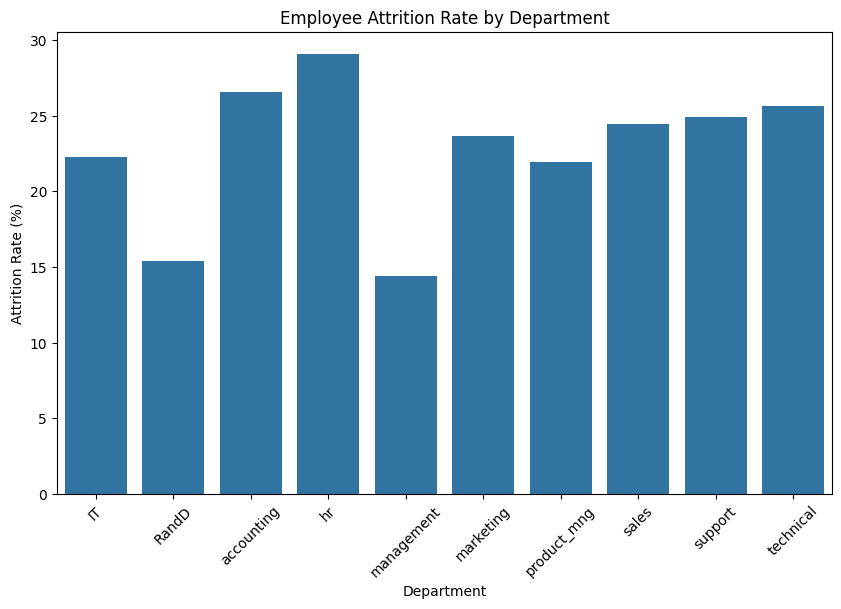

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x='Department', y='left', data = department_retention)
plt.title('Employee Attrition Rate by Department')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.show()

In [8]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Department'], df['left'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value:{p}")

Chi-Square Statistic: 86.82547426790299
P-value:7.042130463822518e-15


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

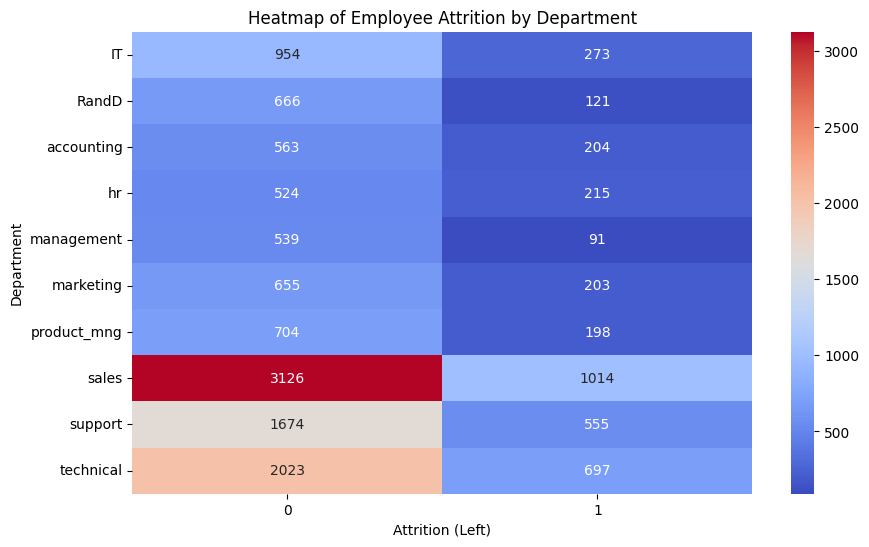

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap="coolwarm")
plt.title('Heatmap of Employee Attrition by Department')
plt.ylabel('Department')
plt.xlabel('Attrition (Left)')
plt.show()

In [11]:
numerical_columns= ['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']
department_retention = df.groupby('left')[numerical_columns].mean().reset_index()
print(department_retention)

   left  satisfaction_level  last_evaluation  number_project  \
0     0            0.666810         0.715473        3.786664   
1     1            0.440098         0.718113        3.855503   

   average_montly_hours  time_spend_company  Work_accident  \
0            199.060203            3.380032       0.175009   
1            207.419210            3.876505       0.047326   

   promotion_last_5years  
0               0.026251  
1               0.005321  


In [12]:
from scipy.stats import ttest_ind
for col in numerical_columns:
  stayed = df[df['left']==0][col]
  left = df[df['left']==1][col]
  t_stat, p_value = ttest_ind(stayed, left)
  print(f"{col} - T-Statistic: {t_stat}, P-value: {p_value}")

satisfaction_level - T-Statistic: 51.61280155890104, P-value: 0.0
last_evaluation - T-Statistic: -0.8042416167796329, P-value: 0.4212701963735056
number_project - T-Statistic: -2.9138564358459607, P-value: 0.0035752138709418788
average_montly_hours - T-Statistic: -8.752254731850009, P-value: 2.3113035567540143e-18
time_spend_company - T-Statistic: -17.924210234916146, P-value: 4.207680457692596e-71
Work_accident - T-Statistic: 19.165804033090172, P-value: 6.613049400454692e-81
promotion_last_5years - T-Statistic: 7.581195349367637, P-value: 3.624047224146943e-14


In [17]:
df_encoded = pd.get_dummies(df, columns=['Department'], drop_first=True)
print(df_encoded.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  salary  \
0                   3              0     1                      0     low   
1                   6              0     1                      0  medium   
2                   4              0     1                      0  medium   
3                   5              0     1                      0     low   
4                   3              0     1                      0     low   

   Department_RandD  Department_accounting  Department_h

In [24]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
df_encoded['salary'] = le.fit_transform(df_encoded['salary'])

In [39]:
from sklearn.model_selection import train_test_split
x = df_encoded.drop('left', axis=1)
y = df_encoded['left'].to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state=42)
print(Y_train)

[1 1 0 ... 0 1 0]


In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [46]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [47]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [48]:
model.score(X_test, Y_test)

0.7578666666666667